# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [169]:
import pandas as pd

In [170]:
data = pd.read_csv('train (2).csv')

In [171]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [172]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

In [173]:
train

,id,keyword,location,text,target
1186,1707,bridge%20collapse,NaN,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1
5787,8257,rioting,NaN,Still rioting in a couple of hours left until ...,1
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [174]:
pd.DataFrame([train.isnull().sum(), test.isnull().sum()]).T.rename(columns = {0:'Train', 1:'Test'})

,Train,Test
id,0,0
keyword,44,17
location,1760,773
text,0,0
target,0,0


In [175]:
train = train.fillna('')
test = test.fillna('')

In [176]:
pd.DataFrame([train.isnull().sum(), test.isnull().sum()]).T.rename(columns = {0:'Train', 1:'Test'})

,Train,Test
id,0,0
keyword,0,0
location,0,0
text,0,0
target,0,0


In [177]:
train

,id,keyword,location,text,target
1186,1707,bridge%20collapse,,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1
5787,8257,rioting,,Still rioting in a couple of hours left until ...,1
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,,just had a panic attack bc I don't have enough...,0
860,1242,blood,,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,,,Officials say a quarantine is in place at an A...,1


## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [178]:
temp = train.groupby('target').count()['id']
print(f'К классу настоящих катастроф  относятся {temp[1]} записей, {round(temp[1] * 100/(temp[0]+temp[1]), 2)}% от всех записей')
print(f'К классу нерелевантных постов относятся {temp[0]} записей, {round(temp[0] * 100/(temp[0]+temp[1]), 2)}% от всех записей')

К классу настоящих катастроф  относятся 2305 записей, 43.25% от всех записей
К классу нерелевантных постов относятся 3024 записей, 56.75% от всех записей


[Text(0, 0, 'nuclear%20reactor'),
 Text(0, 0, 'damage'),
 Text(0, 0, 'siren'),
 Text(0, 0, 'emergency'),
 Text(0, 0, 'derail'),
 Text(0, 0, 'deluge'),
 Text(0, 0, 'fatality'),
 Text(0, 0, 'fatalities'),
 Text(0, 0, 'fear'),
 Text(0, 0, 'wreckage')]

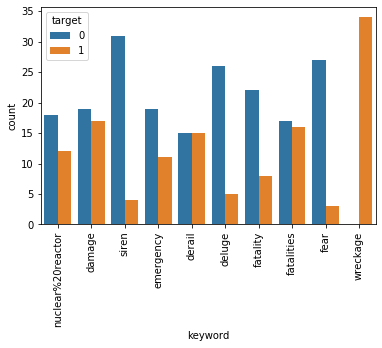

In [179]:
import seaborn as sns
temp = train.groupby('keyword').count().sort_values('id', ascending=False)[1:11]
data_0 = train[train['keyword'].isin(list(temp.index.values))]
ax = sns.countplot(data=data_0, x='keyword', hue='target')
txt = ax.get_xticklabels()
ax.set_xticklabels(txt, rotation=90)

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [180]:
import numpy as np
train['sentence'] = train['keyword'] + ' ' + train['location'] + ' ' + train['text']
train = train.drop(['keyword', 'location', 'text', 'id'], axis=1)

In [181]:
train

,target,sentence
1186,0,bridge%20collapse Ashes 2015: AustraliaÛªs c...
4071,1,"hail Carol Stream, Illinois GREAT MICHIGAN TEC..."
5461,1,police Houston CNN: Tennessee movie theater s...
5787,1,rioting Still rioting in a couple of hours le...
7445,0,wounds Lake Highlands Crack in the path where ...
...,...,...
5226,0,obliteration Merica! @Eganator2000 There aren'...
5390,0,panic just had a panic attack bc I don't have...
860,0,blood Omron HEM-712C Automatic Blood Pressure...
7603,1,Officials say a quarantine is in place at an...


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [182]:
#from nltk.tokenize import word_tokenize
#texts_tokenized = [' '.join([w for w in word_tokenize(t) if w.isalpha()]) for t in train['sentence']]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(train['sentence']) # <--- text_tokenized
X.shape

# если убрать комменты все и поменять на text_tokenized в трансформе данные, то будет токенизация с word_tokenize

(5329, 18455)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [183]:
import unicodedata
def check_numbers(dictionary):
    numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    counter = 0
    for word in dictionary:
        for symbol in word:
            if symbol in numbers:
                counter+=1
                break
    return (counter)

def check_punctuation(dictionary):
    counter = 0
    for word in dictionary:
        for symbol in word:
            if unicodedata.category(symbol).startswith("P"):
                counter+=1
                break
    return (counter)

def check_mentions(dictionary):
    counter = 0
    for word in dictionary:
        if (word[0] == '@' or word[0] == '#'):
            counter+=1
    return (counter)

print(f'Cлов с числами: {check_numbers(cv.vocabulary_)}')
print(f'Слов с знаками препинания: {check_punctuation(cv.vocabulary_)}')
print(f'Слов с упоминаниями: {check_mentions(cv.vocabulary_)}')


Cлов с числами: 3812
Слов с знаками препинания: 315
Слов с упоминаниями: 0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [184]:
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
tw = TweetTokenizer()
texts_tokenized = [' '.join([w for w in tw.tokenize(t) if w.isalpha()]) for t in train['sentence']]
cv_2 = CountVectorizer()
X = cv_2.fit_transform(texts_tokenized)
X.shape

(5329, 11698)

In [185]:
import unicodedata
def check_numbers(dictionary):
    numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    counter = 0
    for word in dictionary:
        for symbol in word:
            if symbol in numbers:
                counter+=1
                break
    return (counter)

def check_punctuation(dictionary):
    counter = 0
    for word in dictionary:
        for symbol in word:
            if unicodedata.category(symbol).startswith("P"):
                counter+=1
                break
    return (counter)

def check_mentions(dictionary):
    counter = 0
    for word in dictionary:
        if (word[0] == '@' or word[0] == '#'):
            counter+=1
    return (counter)

print(f'Cлов с числами: {check_numbers(cv_2.vocabulary_)}')
print(f'Слов с знаками препинания: {check_punctuation(cv_2.vocabulary_)}')
print(f'Слов с упоминаниями: {check_mentions(cv_2.vocabulary_)}')


Cлов с числами: 0
Слов с знаками препинания: 0
Слов с упоминаниями: 0


## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [196]:
import re
import string
import nltk
from nltk.stem.snowball import SnowballStemmer

def latin_check(element):
    if re.search(r'[^a-zA-Z]', element):
        return (0)
    return (1)

def smile_check(element):
    for i in element:
        if i not in string.punctuation:
            return (0)
    for i in element:
        if i == ')' or i == '(':
            return (1)
    return(0)

def hashtag_check(element):
    if element[0] == '#' and len(element) != 1:
        if re.search(r'[^a-zA-Z]', element[1:]):
            return (0)
        return (1)
    return (0)

def check_rules(element):
    if latin_check(element) == 0:
        if smile_check(element):
            return (1)
        elif hashtag_check(element):
            return (1)
        else:
            return (0)
    elif element in nltk.corpus.stopwords.words('english'):
        return (0)
    else:
        return (1)

    
def tokenize(string):
    tt = TweetTokenizer()
    stemmer = SnowballStemmer('english')
    temp = tt.tokenize(string.lower())
    new = []
    for i in temp:
        if check_rules(i):
            new.append(stemmer.stem(i))
    return new

In [199]:
for i in train['sentence'][0:10]:
    print(tokenize(i))

['bridg', 'ash', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']
['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon']
['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']
['riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class']
['wound', 'lake', 'highland', 'crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee']
['airplan', 'somewher', 'expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', '#mlb']
['bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast']
['burn', 'except', 'idk', 'realli', 'burn']
['destroy', '(', 'ask', ')', 'destroy', 'hous']
['wound', 'maracay', 'nirgua', 'venezuela', 'polic', 'offic', 'wound', 'suspect

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [203]:
test['sentence'] = test['keyword'] + ' ' + test['location'] + ' ' + test['text']
test = test.drop(['keyword', 'location', 'text', 'id'], axis=1)

,target,sentence
2644,1,destruction So you have a new weapon that can...
2227,0,deluge The f$&amp;@ing things I do for #GISHW...
5448,1,police UK DT @georgegalloway: RT @Galloway4May...
132,0,aftershock Aftershock back to school kick off...
6845,0,"trauma Montgomery County, MD in response to tr..."
...,...,...
4307,0,"hellfire 570 Vanderbilt; Brooklyn, NY New cock..."
3375,1,evacuation USA Bend Post Office roofers cut ga...
1710,1,collided Monsoon flooding - Monsoon rains hav...
4898,1,massacre Ireland Remember this was a massacre ...


In [226]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор
from sklearn.feature_extraction.text import CountVectorizer

In [212]:
vec = CountVectorizer(ngram_range=(1, 1))
text_tokenized_train = [' '.join([w for w in tokenize(t) if w.isalpha()]) for t in train['sentence']]
train['sentence'] = text_tokenized_train
text_tokenized_test = [' '.join([w for w in tokenize(t) if w.isalpha()]) for t in test['sentence']]
test['sentence'] = text_tokenized_test
#bow = vec.fit_transform(train['sentence']) #обучающая часть в train датасете. Потом также буду сплитить и test.
#bow_test = vec.transform(train['target'])

In [223]:
vec = CountVectorizer()
bow = vec.fit_transform(train['sentence'])
bow_test = vec.transform(test['sentence'])

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

In [227]:
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow, train['target'])
pred = clf.predict(bow_test)
print(classification_report(test['target'], pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1318
           1       0.79      0.68      0.73       966

    accuracy                           0.79      2284
   macro avg       0.79      0.77      0.78      2284
weighted avg       0.79      0.79      0.79      2284



## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [229]:
#1
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(ngram_range=(1, 1))
vec_train = vec.fit_transform(train['sentence'])
vec_test = vec.transform(test['sentence'])


scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

clf = LogisticRegression(max_iter=300, random_state=42)
clf.fit(vec_train, train['target'])
pred_tfidf = clf.predict(vec_test)
print(classification_report(test['target'], pred_tfidf))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1318
           1       0.79      0.70      0.75       966

    accuracy                           0.80      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.80      0.80      0.79      2284



In [232]:
#2
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(ngram_range=(1, 1), max_df = 0.9)
vec_train = vec.fit_transform(train['sentence'])
vec_test = vec.transform(test['sentence'])


scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

clf = LogisticRegression(max_iter=300, random_state=42)
clf.fit(vec_train, train['target'])
pred_tfidf = clf.predict(vec_test)
print(classification_report(test['target'], pred_tfidf))


              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1318
           1       0.79      0.70      0.75       966

    accuracy                           0.80      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.80      0.80      0.79      2284



In [238]:
#3
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(ngram_range=(1, 1), max_df = 0.9, min_df = 0.002)
vec_train = vec.fit_transform(train['sentence'])
vec_test = vec.transform(test['sentence'])


scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

clf = LogisticRegression(max_iter=300, random_state=42)
clf.fit(vec_train, train['target'])
pred_tfidf = clf.predict(vec_test)
print(classification_report(test['target'], pred_tfidf))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1318
           1       0.78      0.69      0.74       966

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.78      2284
weighted avg       0.79      0.79      0.79      2284



**Выводы:**

1) Качество выросло!

2) Изменения не обнаржены.

3) Не удалось увеличить качество. При минимизации min_df оно стремится к показателям второго пункта.

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [239]:
from sklearn.feature_extraction.text import HashingVectorizer
vec = HashingVectorizer(ngram_range=(1, 1), n_features = 5000)
vec_train = vec.fit_transform(train['sentence'])
vec_test = vec.transform(test['sentence'])


scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

clf = LogisticRegression(max_iter=300, random_state=42)
clf.fit(vec_train, train['target'])
pred_tfidf = clf.predict(vec_test)
print(classification_report(test['target'], pred_tfidf))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1318
           1       0.77      0.69      0.73       966

    accuracy                           0.78      2284
   macro avg       0.78      0.77      0.77      2284
weighted avg       0.78      0.78      0.78      2284



Вывод:

1) Этот крутой метод не позволил увеличить качество

2) Самым крутым оказался старый добрый tfidefvectorizer

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [323]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score

vec = TfidfVectorizer(ngram_range=(1, 2), max_df = 0.9, max_features=5000000, norm = 'l2', use_idf=True, sublinear_tf = True, analyzer = 'word', strip_accents='unicode', decode_error='strict')
vec_train = vec.fit_transform(train['sentence'])
vec_test = vec.transform(test['sentence'])


scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

clf = LogisticRegression(max_iter=200, random_state=13)
clf.fit(vec_train, train['target'])
pred_tfidf = clf.predict(vec_test)
print(classification_report(test['target'], pred_tfidf))

f1 = f1_score(test['target'], pred_tfidf)
print(f'Финальное значение f1:{f1}')

#админ я оч старался но на 1 сотую не могу никак емае:_( 

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1318
           1       0.79      0.71      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284

Финальное значение f1:0.7487791644058599
